In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [45]:
data = df.to_numpy()
data[:5]

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,  12. ],
       [151.5,  41.3,  58.5,  16.5],
       [180.8,  10.8,  58.4,  17.9]])

In [46]:
# Bai 1
def get_columsData(data,i):
    result = [row[i] for row in data]
    return result

In [47]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)
    TV = get_columsData(data,0)
    Radio = get_columsData(data,1)
    newpaper = get_columsData(data,2)
    sales = get_columsData(data,3)
    X = [TV,Radio,newpaper]
    y = sales
    return X,y

In [48]:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.1, 300.5, 78.9]


In [49]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1*w1 +  x2*w2 + x3*w3  + b
    return result

def compute_loss_mse(y_hat, y):
    result = (y_hat - y)**2
    return result

def compute_loss_mae(y_hat, y):
    result = abs(y_hat - y)
    return result

def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi 

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat - y)
    return dl_db

def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi
    
def update_weight_b(b, dl_db, lr):    
    b = b - lr*dl_db
    return b

In [50]:
#Question 2:
y_p = predict(x1 = 1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [51]:
#Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [52]:
#Question 10:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [53]:
#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [54]:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [55]:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [56]:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)    

0.50001


In [57]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b
def linear_regression(x_data,y_data,epoch = 50 , lr = 1e-5):
    losses = []
    
    w1,w2,w3,b = initialize_params()
    N = len(y_data)
    
    for i in range(epoch):
        '''
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total  = 0.0
        '''
        for j in range(N):
            x1 = x_data[0][j]
            x2 = x_data[1][j]
            x3 = x_data[2][j]
            y = y_data[j]
            
            y_hat = predict(x1,x2,x3,w1,w2,w3,b)
            
            loss = compute_loss_mse(y_hat,y)
            #loss_total += loss
            
            dw1 = compute_gradient_wi(x1,y,y_hat)
            dw2 = compute_gradient_wi(x2,y,y_hat)
            dw3 = compute_gradient_wi(x3,y,y_hat)
            db = compute_gradient_b(y,y_hat)
            '''
            dw1_total += dw1
            dw2_total += dw2
            dw3_total += dw3
            db_total  += db
            '''
            w1 = update_weight_wi(w1, dw1, lr)
            w2 = update_weight_wi(w2, dw2, lr)
            w3 = update_weight_wi(w3, dw3, lr)
            b  = update_weight_b(b, db, lr)
            
            losses.append(loss)
    return(w1,w2,w3,b, losses)

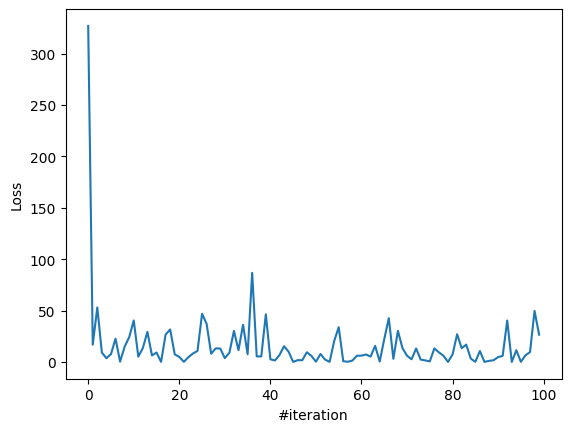

In [58]:
X,Y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = linear_regression(X,Y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [59]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [60]:
tv = 19.2
radio = 35.9 
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [61]:
tv = 230.1
radio = 37.8 
newspaper = 69.2

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 24.412408996908397


In [62]:
#using N sample training

def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b
def linear_regression_nsamples(x_data,y_data,epoch = 50 , lr = 1e-5):
    losses = []
    
    w1,w2,w3,b = initialize_params()
    N = len(y_data)
    
    for i in range(epoch):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total  = 0.0
        for j in range(N):
            x1 = x_data[0][j]
            x2 = x_data[1][j]
            x3 = x_data[2][j]
            y = y_data[j]
            
            y_hat = predict(x1,x2,x3,w1,w2,w3,b)
            
            loss = compute_loss_mse(y_hat,y)
            loss_total += loss
            
            dw1 = compute_gradient_wi(x1,y,y_hat)
            dw2 = compute_gradient_wi(x2,y,y_hat)
            dw3 = compute_gradient_wi(x3,y,y_hat)
            db = compute_gradient_b(y,y_hat)
            
            dw1_total += dw1
            dw2_total += dw2
            dw3_total += dw3
            db_total  += db
            
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b  = update_weight_b(b, db_total/N, lr)
            
        losses.append(loss_total/N)
    return(w1,w2,w3,b, losses)

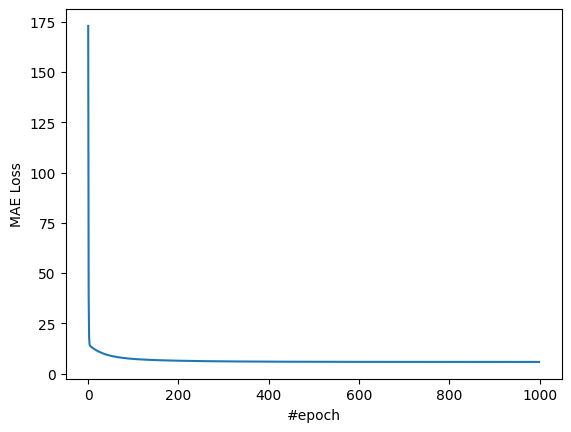

In [63]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [64]:
#Question 11:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


#### ADVANCED

In [65]:
path = 'advertising.csv'

In [66]:
def prepare_data_review(path):
    data = np.genfromtxt(path,delimiter=',',skip_header=1).tolist()
    return data

data = prepare_data_review(path)
print(type(data))
data[:5]

<class 'list'>


[[230.1, 37.8, 69.2, 22.1],
 [44.5, 39.3, 45.1, 10.4],
 [17.2, 45.9, 69.3, 12.0],
 [151.5, 41.3, 58.5, 16.5],
 [180.8, 10.8, 58.4, 17.9]]

In [67]:
def get_columns(data,index):
    return [row[index] for row in data]

tv = get_columns(data,0)
tv[:5]

[230.1, 44.5, 17.2, 151.5, 180.8]

In [68]:
def prepare_data(path):
    data = np.genfromtxt(path, delimiter=',', skip_header=1).tolist()
    
    tv = get_columns(data, 0)
    radio = get_columns(data, 1)
    newspaper = get_columns(data, 2)
    sales = get_columns(data, 3)
    
    X_data = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv, radio, newspaper)]
    return np.array(X_data), np.array(sales)

In [69]:
x,y = prepare_data(path)
x[0]

array([  1. , 230.1,  37.8,  69.2])

In [70]:
def initialize_params():
    '''
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    '''
    return [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]

In [71]:
weight = initialize_params()
print(weight)

[0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]


In [72]:
result = 0
for a,b in zip(x[0],weight):
    result += a*b
result

4.0177771187751805

In [73]:
rev = np.dot(x[0],weight)
rev

4.0177771187751805

In [74]:
tmp = np.dot(2,x[0])
tmp 

array([  2. , 460.2,  75.6, 138.4])

In [75]:
result = np.dot(tmp,(y[0]-rev))
result

array([  36.16444576, 8321.43896994, 1367.01604982, 2502.57964676])

In [76]:
lr = 1e-5
temp = np.dot(result,lr)
weight = weight - temp 
weight

array([-0.00036164, -0.06622213, -0.00659179, -0.02733366])

In [77]:
def predict(X_feature,weights):
    y_predict = np.dot(X_feature,weights)
    return y_predict

def compute_loss(y_hat,y):
    return (y_hat - y)**2

def gradient_w(X_feature,y,y_hat):
    tmp = np.dot(2,X_feature)
    error = y_hat-y
    result = np.dot(tmp,error)
    return result

def update_weight(weight,dw,lr):
    temp = np.dot(lr,dw)
    weight = weight - temp
    return weight
    

In [78]:
def implement_linear_regression(X_feature, y_output, epoch_max = 50, lr = 1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    
    for epoch in range(epoch_max):
        for i in range(N):  
            features_i = np.array(X_feature[i])
            y = y_output[i]  
            
            y_hat = predict(features_i, weights)
            loss = compute_loss(y, y_hat)
            dl_dweights = gradient_w(features_i, y, y_hat)
            weights = update_weight(weights, dl_dweights, lr)
            losses.append(loss) 
            
    return weights, losses


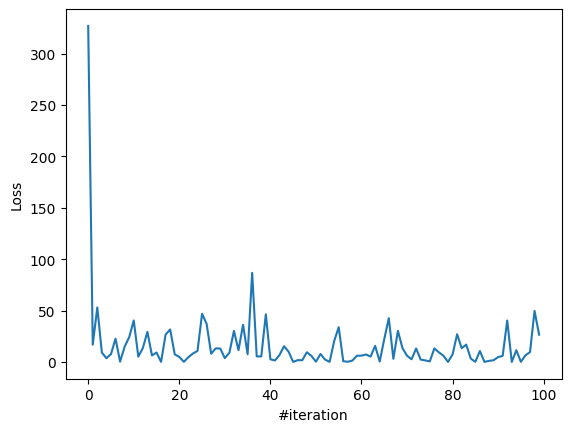

In [79]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

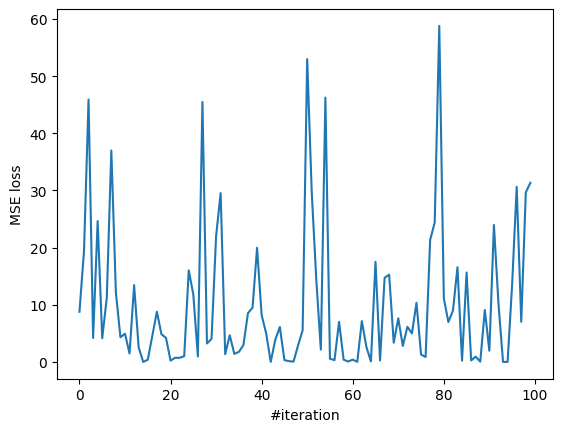

In [80]:
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE loss")
plt.show()

In [81]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
print(L[9999])

31.338878034644296


y_hat = np.array([[0.34],])

In [82]:
np.zeros((2,1))

array([[0.],
       [0.]])